In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix

In [14]:
x_train = [np.array([1, 1, 1, 1,
                    1, 0, 0, 1,
                    1, 1, 0, 1,
                    1, 1, 1, 1]),#.reshape(4, 4),
           
           np.array([1, 0, 0, 1,
                    0, 1, 1, 0,
                    0, 1, 1, 1,
                    1, 0, 0, 1]),
           
           np.array([1, 0, 0, 1,
                    0, 1, 1, 0,
                    0, 1, 1, 0,
                    1, 1, 0, 1]),
           
           np.array([1, 1, 1, 1,
                    1, 0, 0, 1,
                    1, 0, 0, 1,
                    1, 0, 1, 1]),
           
           np.array([1, 1, 1, 1,
                    0, 0, 0, 1,
                    1, 0, 0, 1,
                    1, 1, 1, 1]),
           
           np.array([1, 1, 1, 1,
                    1, 0, 0, 1,
                    1, 0, 0, 0,
                    1, 1, 1, 1]),
           
           np.array([1, 1, 1, 1,
                    1, 0, 0, 1,
                    1, 0, 0, 1,
                    1, 1, 1, 1]),
           
           np.array([1, 0, 0, 1,
                    0, 1, 1, 0,
                    0, 1, 1, 0,
                    1, 0, 0, 1]),
           
           np.array([1, 0, 1, 1,
                    0, 1, 1, 0,
                    0, 1, 1, 0,
                    1, 0, 0, 1]),
           
           np.array([1, 0, 0, 1,
                    0, 1, 1, 0,
                    0, 1, 1, 0,
                    1, 1, 0, 1])]

# value 1, 0 -> A     0, 1 -> B
y_train = [np.array([1, 0]), np.array([0, 1]), np.array([0, 1]), np.array([1, 0]), np.array([1, 0]), np.array([1, 0]), 
     np.array([1, 0]), np.array([0, 1]), np.array([0, 1]), np.array([0, 1])]


In [15]:
x_train = np.array(x_train)
y_train = np.array(y_train)
print(x_train.shape)
print(y_train.shape)

(10, 16)
(10, 2)


In [16]:
x_test = [np.array([1, 0, 0, 1,
                    0, 1, 1, 0,
                    0, 1, 1, 0,
                    1, 0, 0, 1]),#.reshape(4, 4),
          
          np.array([1, 1, 1, 1,
                    1, 0, 0, 1,
                    1, 0, 0, 1,
                    1, 1, 1, 1]),
         
         np.array([1, 1, 1, 1,
                    1, 1, 0, 1,
                    1, 0, 0, 1,
                    1, 1, 1, 1]),
         
         np.array([1, 0, 0, 1,
                    0, 1, 1, 1,
                    0, 1, 1, 0,
                    1, 0, 0, 1])]

y_test = [np.array([0, 1]), np.array([1, 0]), np.array([1, 0]), np.array([0, 1])]

In [17]:
x_test = np.array(x_test)
y_test = np.array(y_test)

In [18]:
def mlp_classification(x_train, y_train, x_test, y_test, learning_rate, momentum, shuffle_data, actvtn="relu"):
    mlp = None
    max_error = 0.01
    currentLoss = 10
    
    # only returns a neural network when the error is less than maximum error
    while currentLoss > max_error:
        mlp = MLPClassifier(solver='sgd', shuffle=shuffle_data, activation=actvtn,
                    max_iter=100_000, tol=1e-10, hidden_layer_sizes=(8,2),
                    momentum=momentum, learning_rate_init=learning_rate , verbose=False, n_iter_no_change=300)
        
        # trains the neural network and get the 
        mlp.fit(x_train, y_train)
        currentLoss = min(mlp.loss_curve_)
    
    print('Score: ', mlp.score(x_test, y_test))
    print('Number of iterations: ', mlp.n_iter_)
    print('Loss: ', currentLoss)
    
    return mlp

## Test with r = 0.1, momentum = 1

Score:  1.0
Number of iterations:  323
Loss:  0.00033230553378684716
[[[2 0]
  [0 2]]

 [[2 0]
  [0 2]]]


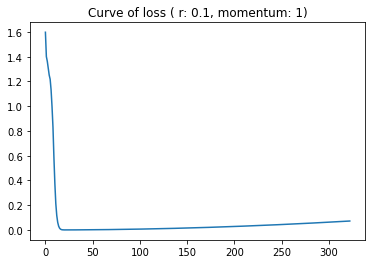

In [19]:
momentum = 1
learn_rate = 0.1
shuffle_data = False

mlp = mlp_classification(x_train, y_train, x_test, y_test, learn_rate, momentum, shuffle_data)
y2 = mlp.predict(x_test)
print(multilabel_confusion_matrix(y_test, y2))

## MAKE THE GRAPH
curve = mlp.loss_curve_
plt.plot(curve)
plt.title("Curve of loss ( r: " + str(learn_rate) + ", momentum: " + str(momentum) +")")
plt.show()

## Test learning rate = 0.01 and momentum = 1

Score:  1.0
Number of iterations:  452
Loss:  0.0014005384925407033
[[[2 0]
  [0 2]]

 [[2 0]
  [0 2]]]


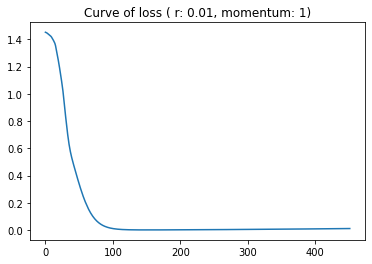

In [20]:
momentum = 1
learn_rate = 0.01
shuffle_data = False

mlp = mlp_classification(x_train, y_train, x_test, y_test, learn_rate, momentum, shuffle_data)
y2 = mlp.predict(x_test)
print(multilabel_confusion_matrix(y_test, y2))

## MAKE THE GRAPH
curve = mlp.loss_curve_
plt.plot(curve)
plt.title("Curve of loss ( r: " + str(learn_rate) + ", momentum: " + str(momentum) +")")
plt.show()

### Test with r = 0.001, momentum = 1

Score:  1.0
Number of iterations:  435
Loss:  0.00019796781875926005
[[[2 0]
  [0 2]]

 [[2 0]
  [0 2]]]
Score:  1.0
Number of iterations:  526
Loss:  0.00022391362519146642
[[[2 0]
  [0 2]]

 [[2 0]
  [0 2]]]
Score:  1.0
Number of iterations:  709
Loss:  0.0015635346625479459
[[[2 0]
  [0 2]]

 [[2 0]
  [0 2]]]
Score:  1.0
Number of iterations:  770
Loss:  0.0023889744243989924
[[[2 0]
  [0 2]]

 [[2 0]
  [0 2]]]
Score:  1.0
Number of iterations:  799
Loss:  0.0030454915507641027
[[[2 0]
  [0 2]]

 [[2 0]
  [0 2]]]


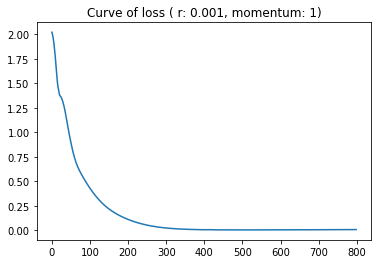

In [28]:
momentum = 1
learn_rate = 0.001
shuffle_data = False

for i in range(5):
    mlp = mlp_classification(x_train, y_train, x_test, y_test, learn_rate, momentum, shuffle_data)
    y2 = mlp.predict(x_test)
    print(multilabel_confusion_matrix(y_test, y2))

## MAKE THE GRAPH
curve = mlp.loss_curve_
plt.plot(curve)
plt.title("Curve of loss ( r: " + str(learn_rate) + ", momentum: " + str(momentum) +")")
plt.show()

### Test with r = 0.001, momentum = 1, activation = "identity"

Score:  1.0
Number of iterations:  460
Loss:  0.00020581243236106545
[[[2 0]
  [0 2]]

 [[2 0]
  [0 2]]]
Score:  1.0
Number of iterations:  401
Loss:  0.00019743383561491348
[[[2 0]
  [0 2]]

 [[2 0]
  [0 2]]]
Score:  1.0
Number of iterations:  413
Loss:  0.00015660650702822997
[[[2 0]
  [0 2]]

 [[2 0]
  [0 2]]]
Score:  1.0
Number of iterations:  406
Loss:  0.00022665200952475114
[[[2 0]
  [0 2]]

 [[2 0]
  [0 2]]]
Score:  1.0
Number of iterations:  402
Loss:  0.00015935434063342092
[[[2 0]
  [0 2]]

 [[2 0]
  [0 2]]]


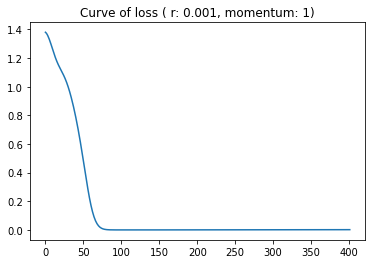

In [29]:
momentum = 1
learn_rate = 0.001
shuffle_data = False

for i in range(5):
    mlp = mlp_classification(x_train, y_train, x_test, y_test, learn_rate, momentum, shuffle_data, "identity")
    y2 = mlp.predict(x_test)
    print(multilabel_confusion_matrix(y_test, y2))

## MAKE THE GRAPH
curve = mlp.loss_curve_
plt.plot(curve)
plt.title("Curve of loss ( r: " + str(learn_rate) + ", momentum: " + str(momentum) +")")
plt.show()

### Test with r = 0.001, momentum = 1, activation = "logistic"

Score:  1.0
Number of iterations:  1196
Loss:  0.004165413810690417
[[[2 0]
  [0 2]]

 [[2 0]
  [0 2]]]
Score:  1.0
Number of iterations:  1280
Loss:  0.0040143296981859
[[[2 0]
  [0 2]]

 [[2 0]
  [0 2]]]
Score:  1.0
Number of iterations:  1322
Loss:  0.005227816418312637
[[[2 0]
  [0 2]]

 [[2 0]
  [0 2]]]
Score:  1.0
Number of iterations:  1205
Loss:  0.0034977699266591834
[[[2 0]
  [0 2]]

 [[2 0]
  [0 2]]]
Score:  1.0
Number of iterations:  2903
Loss:  0.006352291615436221
[[[2 0]
  [0 2]]

 [[2 0]
  [0 2]]]


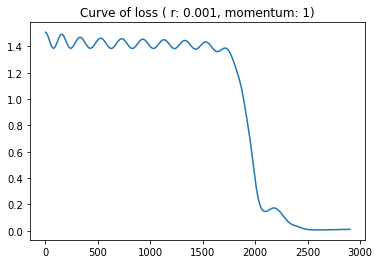

In [23]:
momentum = 1
learn_rate = 0.001
shuffle_data = False

for i in range(5):
    mlp = mlp_classification(x_train, y_train, x_test, y_test, learn_rate, momentum, shuffle_data, "logistic")
    y2 = mlp.predict(x_test)
    print(multilabel_confusion_matrix(y_test, y2))

## MAKE THE GRAPH
curve = mlp.loss_curve_
plt.plot(curve)
plt.title("Curve of loss ( r: " + str(learn_rate) + ", momentum: " + str(momentum) +")")
plt.show()

### Test with r = 0.001, momentum = 1, activation = "tanh"

Score:  1.0
Number of iterations:  607
Loss:  0.0013714933329095134
[[[2 0]
  [0 2]]

 [[2 0]
  [0 2]]]
Score:  1.0
Number of iterations:  593
Loss:  0.0014379710165021648
[[[2 0]
  [0 2]]

 [[2 0]
  [0 2]]]
Score:  1.0
Number of iterations:  618
Loss:  0.0016208110627956372
[[[2 0]
  [0 2]]

 [[2 0]
  [0 2]]]
Score:  1.0
Number of iterations:  655
Loss:  0.001995426757740386
[[[2 0]
  [0 2]]

 [[2 0]
  [0 2]]]
Score:  1.0
Number of iterations:  671
Loss:  0.0022394011162603818
[[[2 0]
  [0 2]]

 [[2 0]
  [0 2]]]


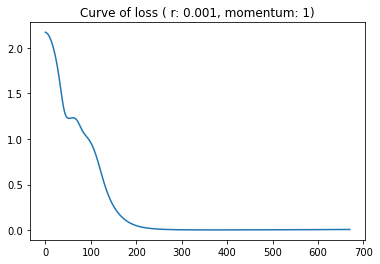

In [24]:
momentum = 1
learn_rate = 0.001
shuffle_data = False

for i in range(5):
    mlp = mlp_classification(x_train, y_train, x_test, y_test, learn_rate, momentum, shuffle_data, "tanh")
    y2 = mlp.predict(x_test)
    print(multilabel_confusion_matrix(y_test, y2))

## MAKE THE GRAPH
curve = mlp.loss_curve_
plt.plot(curve)
plt.title("Curve of loss ( r: " + str(learn_rate) + ", momentum: " + str(momentum) +")")
plt.show()